# 11 - Prática: Predição e a Base de Aprendizado de Máquina (II)

Prazo para entrega: 6 dias. Criar data de entrega utilizando a data de cópia do cartão e o prazo estabelecido para esta tarefa.

Entrega a Ser Feita: Relatório com descrição dos principais conhecimentos adquiridos, anexar o arquivo ao seu cartão.

Seção dentro de um minicurso com conceitos importantes para começar com os primeiros algoritmos de aprendizado de máquina e seus principais conceitos.

O vídeo é inglês e interessante seria o acompanhamento com legendas em inglês, mas se sentir dificuldades pode configurar para que o youtube gere legendas em português sendo a qualidade destas muito boa.

Você irá acessar a nossa conta da Udemy e ir o seguinte curso: Machine Learning, Data Science and Deep Learning with Python. Dentro desse curso faça apenas as seções que estão descritas no checklist abaixo.

# Linear Regression
Vamos fabricar alguns dados que mostram uma relação aproximadamente linear entre a velocidade da página e a quantidade comprada:

In [31]:
# Este comando é usado para garantir que os gráficos sejam exibidos diretamente no Jupyter Notebook
%matplotlib inline

# Importando as bibliotecas necessárias
import numpy as np  # Biblioteca para trabalhar com arrays e números
from pylab import *  # Importa várias funções úteis para gráficos e manipulação de dados

# Gerando dados de exemplo
# 'pageSpeeds' representa a velocidade de carregamento da página, com 1000 valores
# aleatórios seguindo uma distribuição normal com média 3.0 e desvio padrão 1.0
pageSpeeds = np.random.normal(3.0, 1.0, 1000)

# 'purchaseAmount' representa o valor de compra, que diminui à medida que a velocidade da página aumenta.
# Aqui, há um pouco de ruído aleatório sendo adicionado para simular variação real nos dados.
# A fórmula usada simula a relação: quanto maior a velocidade, menor o valor da compra.
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

# Criando um gráfico de dispersão com 'pageSpeeds' no eixo x e 'purchaseAmount' no eixo y
scatter(pageSpeeds, purchaseAmount)


Como temos apenas dois recursos, podemos mantê-lo simples e apenas usar scipy.state.linregress:

In [32]:
# Importa o pacote de estatísticas da biblioteca scipy, necessário para realizar a regressão linear
from scipy import stats

# A função 'linregress' realiza uma regressão linear nos dados fornecidos.
# 'pageSpeeds' é a variável independente (no eixo x) e 'purchaseAmount' é a variável dependente (no eixo y).
# A função retorna cinco valores: a inclinação (slope), a interceptação (intercept), o valor de R (r_value),
# o valor-p (p_value), e o erro padrão da inclinação (std_err).

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


Não é de surpreender que nosso valor de R ao quadrado mostre um ajuste muito bom:

In [33]:
r_value ** 2

0.9899471357781505

Vamos usar a inclinação e a interceptação que obtivemos da regressão para representar graficamente os valores previstos versus os observados:

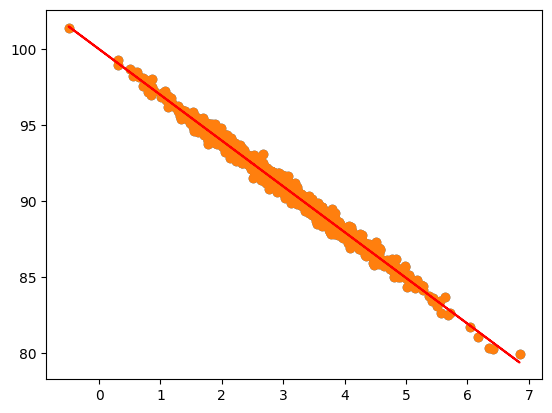

In [34]:
# Importa o módulo de visualização 'matplotlib.pyplot' com o alias 'plt'
import matplotlib.pyplot as plt

# Define uma função 'predict' que utiliza a equação da reta de regressão linear para prever valores de y (purchaseAmount)
# com base em valores de x (pageSpeeds). Ela utiliza a inclinação (slope) e a interceptação (intercept) calculadas anteriormente.
def predict(x):
    return slope * x + intercept

# Aplica a função 'predict' à lista de velocidades da página ('pageSpeeds') para calcular os valores ajustados da linha de regressão.
# O resultado é armazenado em 'fitLine', que contém os valores previstos (linha ajustada) para cada velocidade de página.
fitLine = predict(pageSpeeds)

# Cria um gráfico de dispersão dos dados brutos: 'pageSpeeds' no eixo x e 'purchaseAmount' no eixo y.
# O gráfico de dispersão mostra a relação original entre as duas variáveis (pontos de dados).
plt.scatter(pageSpeeds, purchaseAmount)

# Traça a linha de regressão que se ajusta aos dados.
# O método 'plt.plot' desenha uma linha conectando os pontos de 'pageSpeeds' (eixo x) e 'fitLine' (valores previstos no eixo y).
# O argumento 'c='r'' define a cor da linha como vermelha ('r' para red).
plt.plot(pageSpeeds, fitLine, c='r')

# Exibe o gráfico final com o gráfico de dispersão e a linha de regressão sobreposta.
plt.show()


## Activity
Tente aumentar a variação aleatória nos dados de teste e veja que efeito isso tem no valor do erro r-quadrado

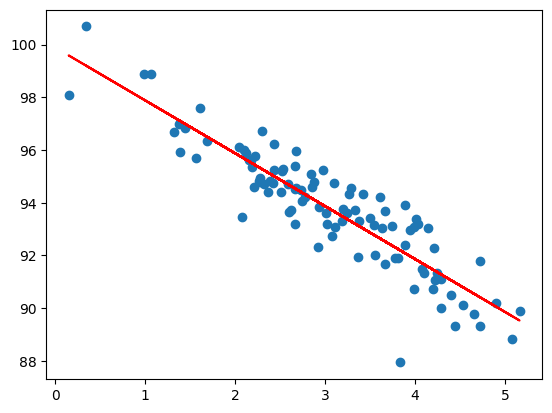

R²: 0.8180436730661416


In [35]:
# Importando as bibliotecas necessárias
import numpy as np  # Biblioteca para manipulação de arrays e operações matemáticas
import scipy.stats as stats  # Biblioteca para funções estatísticas, aqui usada para a regressão linear
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos

# Gerando dados de exemplo
# 'page_speed' representa a velocidade de carregamento da página, com 100 valores aleatórios
# seguindo uma distribuição normal com média 3 e desvio padrão 1
page_speed = np.random.normal(3, 1, 100)

# 'purchase_amount' representa o valor da compra, que é inversamente proporcional à velocidade
# da página. Quanto maior a velocidade da página, menor o valor da compra (com um pouco de ruído aleatório)
purchase_amount = 100 - (page_speed * 2) + np.random.normal(0, 1, 100)

# Ajustando a linha de regressão
# A função linregress realiza a regressão linear e retorna:
# slope (inclinação da reta), intercept (intercepto da reta),
# r_value (coeficiente de correlação), p_value (valor de p para significância estatística)
# e std_err (erro padrão da inclinação)
slope, intercept, r_value, p_value, std_err = stats.linregress(page_speed, purchase_amount)

# Função de previsão
# Esta função utiliza a equação da linha de regressão para prever o valor de 'purchase_amount'
# com base no valor de 'page_speed'
def predict(x):
    return slope * x + intercept

# Plotando os dados e a linha de regressão
plt.scatter(page_speed, purchase_amount)  # Cria um gráfico de dispersão com os dados gerados
plt.plot(page_speed, predict(page_speed), color='red')  # Desenha a linha de regressão sobre os dados
plt.show()  # Exibe o gráfico

# Exibindo o coeficiente de determinação (R²)
# R² é uma métrica que indica o quão bem os dados se ajustam ao modelo de regressão linear.
# Quanto mais próximo de 1, melhor o ajuste.
print(f"R²: {r_value**2}")


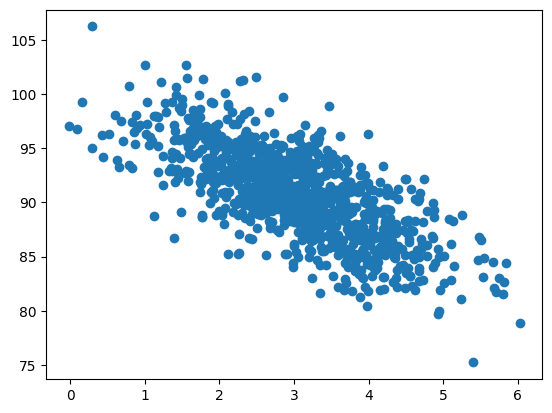

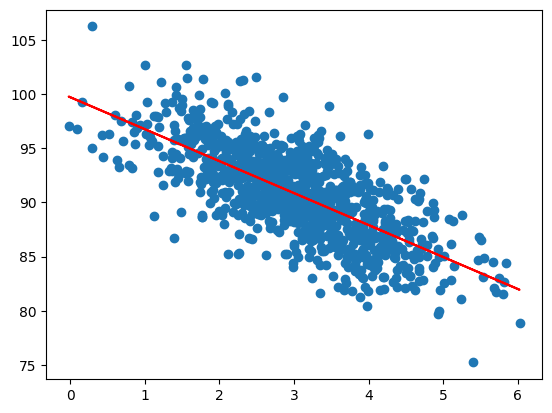

Valor de R²: 0.5080250443992222


In [36]:
# Gerando dados com mais variação aleatória
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
# Aumentando o ruído com um desvio padrão maior (de 0.1 para 1.0)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 1.0, 1000)) * 3

# Gráfico de dispersão dos dados
plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

# Função de predição da linha de regressão
def predict(x):
    return slope * x + intercept

# Calculando a linha de ajuste
fitLine = predict(pageSpeeds)

# Mostrando a linha de regressão ajustada no gráfico
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

# Exibindo o valor de R-quadrado
print(f"Valor de R²: {r_value**2}")